In [250]:
import pandas as pd
import numpy as np

In [405]:
df = pd.read_csv('../../data/survey.csv')

# first we look the data info

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [407]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# we split the data into float int & objective

In [408]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [409]:
cols_float = [f for f in df.columns if df[f].dtypes == 'float64']
cols_int = [i for i in df.columns if df[i].dtypes == 'int64']
cols_object = [o for o in df.columns if df[o].dtypes == 'object']

In [410]:
cols_float

[]

In [411]:
cols_int

['Age']

In [412]:
cols_object

['Timestamp',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

# check the nan data

In [413]:
df_missing = df.isnull().sum()

In [414]:
df_missing = df_missing[df_missing != 0 ].sort_values(ascending=False)

In [415]:
df_missing = df_missing / len(df) * 100

In [416]:
df_missing = pd.DataFrame({'Missing_ratio':df_missing})

In [417]:
df_missing

,Missing_ratio
comments,86.973789
state,40.905481
work_interfere,20.969023
self_employed,1.429706


## check the missing cols

In [418]:
df[~df['comments'].isna()]['comments']

13      I'm not on my company's health insurance which...
15      I have chronic low-level neurological issues t...
16      My company does provide healthcare but not to ...
24                    Relatively new job. Ask again later
25      Sometimes I think  about using drugs for my me...
                              ...                        
1223    Although my employer does everything they can ...
1232    I work at a large university with a track reco...
1234    i'm in a country with social health care so my...
1245    In australia all organisations of a certain si...
1249                                    Bipolar disorder 
Name: comments, Length: 164, dtype: object

In [419]:
df[~df['work_interfere'].isna()]['work_interfere']

0           Often
1          Rarely
2          Rarely
3           Often
4           Never
          ...    
1252    Sometimes
1253       Rarely
1255        Often
1256    Sometimes
1258    Sometimes
Name: work_interfere, Length: 995, dtype: object

In [420]:
df[~df['state'].isna()]['state']

0       IL
1       IN
4       TX
5       TN
6       MI
        ..
1253    UT
1255    IL
1256    CA
1257    NC
1258    IL
Name: state, Length: 744, dtype: object

In [421]:
df[~df['self_employed'].isna()]['self_employed']

18      Yes
19      Yes
20       No
21      Yes
22       No
       ... 
1254     No
1255     No
1256     No
1257     No
1258     No
Name: self_employed, Length: 1241, dtype: object

1. comment just drop it bcz we cant really know the content at first
2. state & work infer & self_employed we use 'none' to replace the nan

In [422]:
df.drop('comments',axis=1,inplace=True)

In [423]:
df['state'].replace(np.nan,'None',inplace=True)
df['self_employed'].replace(np.nan,'None',inplace=True)
df['work_interfere'].replace(np.nan,'None',inplace=True)

## check missing data again

In [424]:
df.isnull().sum()!=0

Timestamp                    False
Age                          False
Gender                       False
Country                      False
state                        False
self_employed                False
family_history               False
treatment                    False
work_interfere               False
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
dtype: bool

# check all object data

In [425]:
object_unique = dict()
for col in cols_object :
    if col == 'comments':
        pass
    else :
        object_unique[col] = len(df[col].unique())

In [426]:
object_unique

{'Timestamp': 1246,
 'Gender': 49,
 'Country': 48,
 'state': 46,
 'self_employed': 3,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 5,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

## we can see there's some strange unique in the data

e.g. gender have 49 unit (but it doesnt make scense bcz only male female third)

### clean the gender data

In [427]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [428]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

In [429]:
'Xsw'.lower()

'xsw'

In [430]:
def trans_gender(gender) :
    try :
        gender = gender.lower()
        if gender in male_str :
            return 'male'
        elif gender in female_str:
            return 'female'
        else :
            return 'trans'
    except AttributeError:
        return gender
df['Gender'] = df['Gender'].apply(lambda x:trans_gender(x))

In [431]:
df['Gender'].unique()

array(['female', 'male', 'trans'], dtype=object)

# clean the time & age data

In [432]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [433]:
df['Timestamp'].head()

0   2014-08-27 11:29:31
1   2014-08-27 11:29:37
2   2014-08-27 11:29:44
3   2014-08-27 11:29:46
4   2014-08-27 11:30:22
Name: Timestamp, dtype: datetime64[ns]

In [434]:
df['fill_month'] = df['Timestamp'].apply(lambda x:x.month)
df['fill_year'] = df['Timestamp'].apply(lambda x:x.year)

In [435]:
df.drop('Timestamp',axis=1,inplace=True)

In [436]:
### general we will change the age into range just like [0-20], [20-40] etc, 

In [437]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

## we replace the age < 0 & > 120 into age medin

In [438]:
df['Age'][df['Age'] > 120] = df['Age'].median()
df['Age'][df['Age'] < 0] = df['Age'].median()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [439]:
from sklearn.preprocessing import LabelEncoder

In [440]:
labelDict = {}
for feature in df.columns:
    le = LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Age [{5: 0, 8: 1, 11: 2, 18: 3, 19: 4, 20: 5, 21: 6, 22: 7, 23: 8, 24: 9, 25: 10, 26: 11, 27: 12, 28: 13, 29: 14, 30: 15, 31: 16, 32: 17, 33: 18, 34: 19, 35: 20, 36: 21, 37: 22, 38: 23, 39: 24, 40: 25, 41: 26, 42: 27, 43: 28, 44: 29, 45: 30, 46: 31, 47: 32, 48: 33, 49: 34, 50: 35, 51: 36, 53: 37, 54: 38, 55: 39, 56: 40, 57: 41, 58: 42, 60: 43, 61: 44, 62: 45, 65: 46, 72: 47}]
label_Gender [{'female': 0, 'male': 1, 'trans': 2}]
label_Country [{'Australia': 0, 'Austria': 1, 'Bahamas, The': 2, 'Belgium': 3, 'Bosnia and Herzegovina': 4, 'Brazil': 5, 'Bulgaria': 6, 'Canada': 7, 'China': 8, 'Colombia': 9, 'Costa Rica': 10, 'Croatia': 11, 'Czech Republic': 12, 'Denmark': 13, 'Finland': 14, 'France': 15, 'Georgia': 16, 'Germany': 17, 'Greece': 18, 'Hungary': 19, 'India': 20, 'Ireland': 21, 'Israel': 22, 'Italy': 23, 'Japan': 24, 'Latvia': 25, 'Mexico': 26, 'Moldova': 27, 'Netherlands': 28, 'New Zealand': 29, 'Nigeria': 30, 'Norway': 31, 'Philippines': 32, 'Poland': 33, 'Portugal': 34, 'R

In [442]:
df['self_employed'].replace(1,-1,inplace=True)
df['work_interfere'].replace(1,-1,inplace=True)

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1259 non-null   int64
 1   Gender                     1259 non-null   int32
 2   Country                    1259 non-null   int32
 3   state                      1259 non-null   int32
 4   self_employed              1259 non-null   int32
 5   family_history             1259 non-null   int32
 6   treatment                  1259 non-null   int32
 7   work_interfere             1259 non-null   int32
 8   no_employees               1259 non-null   int32
 9   remote_work                1259 non-null   int32
 10  tech_company               1259 non-null   int32
 11  benefits                   1259 non-null   int32
 12  care_options               1259 non-null   int32
 13  wellness_program           1259 non-null   int32
 14  seek_help               

# 視覺化

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

In [446]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
fill_year                      0      0.0
care_options                   0      0.0
Gender                         0      0.0
Country                        0      0.0
state                          0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
wellness_program               0      0.0
fill_month                     0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0  

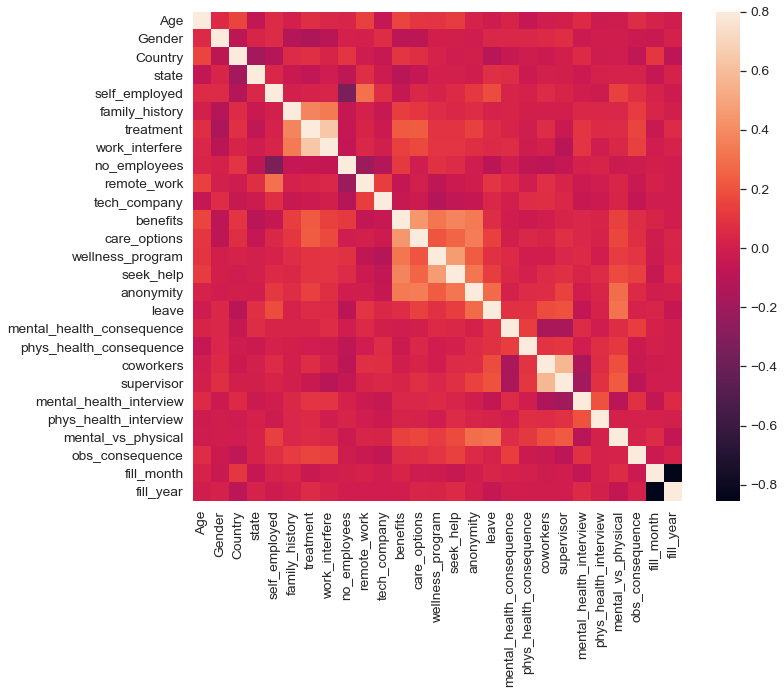

In [447]:
corrmat = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

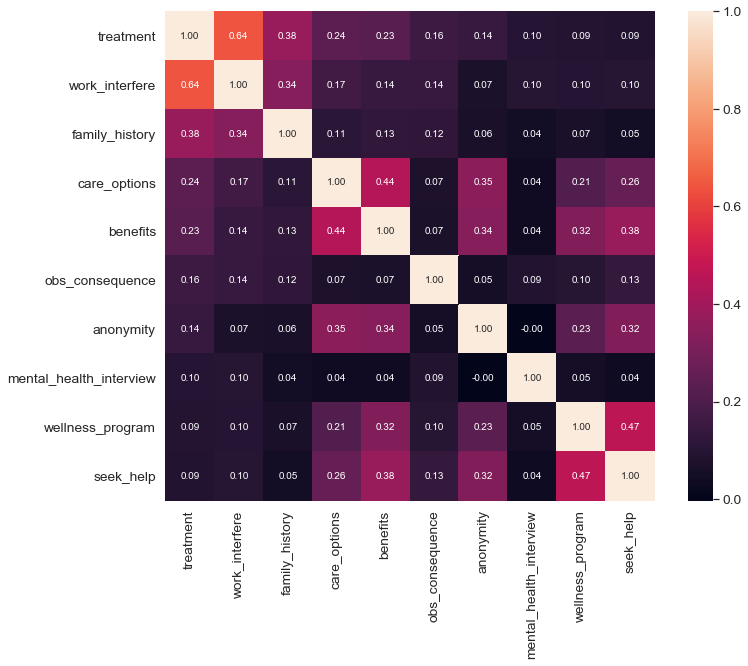

In [448]:
#treatment correlation matrix
plt.figure(figsize=(12,9))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

# scaling and fitting

In [449]:
from sklearn.preprocessing import MinMaxScaler

In [450]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,fill_month,fill_year
0,22,0,45,10,-1,0,1,2,4,0,...,1,1,1,2,1,0,2,0,6,0
1,29,1,45,11,-1,0,0,3,5,0,...,0,1,0,0,1,1,0,0,6,0
2,17,1,7,29,-1,0,0,3,4,0,...,1,1,2,2,2,2,1,0,6,0
3,16,1,44,29,-1,1,1,2,2,0,...,2,2,1,0,0,0,1,1,6,0
4,16,1,45,38,-1,0,0,0,1,1,...,1,1,1,2,2,2,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,11,1,44,29,0,0,1,-1,2,0,...,1,1,1,1,1,1,0,0,7,1
1255,17,1,45,10,0,1,1,2,2,1,...,1,1,1,2,1,1,2,0,7,1
1256,19,1,45,2,0,1,1,4,5,0,...,2,2,0,0,1,1,1,0,9,1
1257,31,0,45,22,0,0,0,-1,1,1,...,2,1,0,0,1,1,1,0,9,1


In [451]:
scaler = MinMaxScaler()
for cols in df.columns :
    if df[cols].max() - df[cols].min() > 80 :
        df[cols] = scaler.fit_transform(df[[cols]])
        print(f'trans_{cols}')
    else :
        pass

# modeling 

In [452]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [453]:
features = df.columns.drop('treatment')
target = 'treatment'

In [454]:
X = df[features]
y = df[target]
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1102)
# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

In [466]:
lgb_c = lgb.LGBMClassifier(max_depth=9)
model = lgb_c.fit(X_train,y_train,verbose=1)

In [467]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,

In [468]:
from sklearn.metrics import roc_auc_score

In [469]:
roc_auc_score(model.predict(X_test),y_test)

0.8076074660633484

In [470]:
roc_auc_score(model.predict(X_train),y_train)

1.0

In [220]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
        #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
        accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
        # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
        if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
        ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    return accuracy

IndentationError: unexpected indent (<ipython-input-220-a039020e8f1b>, line 42)